

https://lucaskellydataportfolio.weebly.com/data-science-blog/visualizing-cumulative-statistics

# Libraries

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function

This calculates a batter's cumulative batting average over the course of a season. Data from any player can come from Baseball Savant and the data worked with here comes from this great site.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def cumulative_avg(df):

    # STEP 1: Create my target/hit column
    # Send the event colum to a list
    events = df['events'].to_list()
    # create a non-hit list
    non_hits = ['single', 'home_run', 'double', 'triple']

    # Run a loop that will label each instance as a hit/non-hit
    hit = []
    for i in events:
        if i in non_hits:
            x = 1
        else:
            x = 0
        hit.append(x)
    df['hit'] = hit
    
    #-----------------------------------------------------------
    # STEP 2: Count official at-bats
    ab = df['events'].to_list()
    count = 0 
    no_at_bat = ['sac_fly', 'walk', 'hit_by_pitch']
    ab_num = []
    for i in ab:
        if i in no_at_bat:
            count += 0
        else:
            count += 1
        ab_num.append(count)
    df['ab #'] = ab_num
    
    #-----------------------------------------------------------
    # STEP 3: Create a count of hits
    hits = df['hit'].to_list()
    count = 0
    total_hits = []
    for i in hits:
        count += i
        total_hits.append(count)
    df['total_hits'] = total_hits

    #-----------------------------------------------------------
    # STEP 4: Create cumulative average column
    df['cum_avg'] = df['total_hits']/df['ab #']
    df['cum_avg'] = np.round(df['cum_avg'],3)
    

In [193]:
def visualize(df, name, save):
    plt.figure(figsize = (24,14))
    plt.plot(df['ab #'], df['cum_avg'], color = 'r')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    x = [.000, .025, .050, .075, .100, .125, .150, .175, .200, .225, .250, .275, .300, .325, .350, .375, .400]
    plt.yticks(x, fontsize=20)
    plt.xticks(fontsize=20)
    plt.ylabel('Cumulative Batting Average', fontsize=24)
    plt.xlabel('# of At Bats', fontsize=24)
    plt.title(str(name) + "'s 2019 Batting Average", fontsize=24)
    plt.savefig(save)
    plt.show()

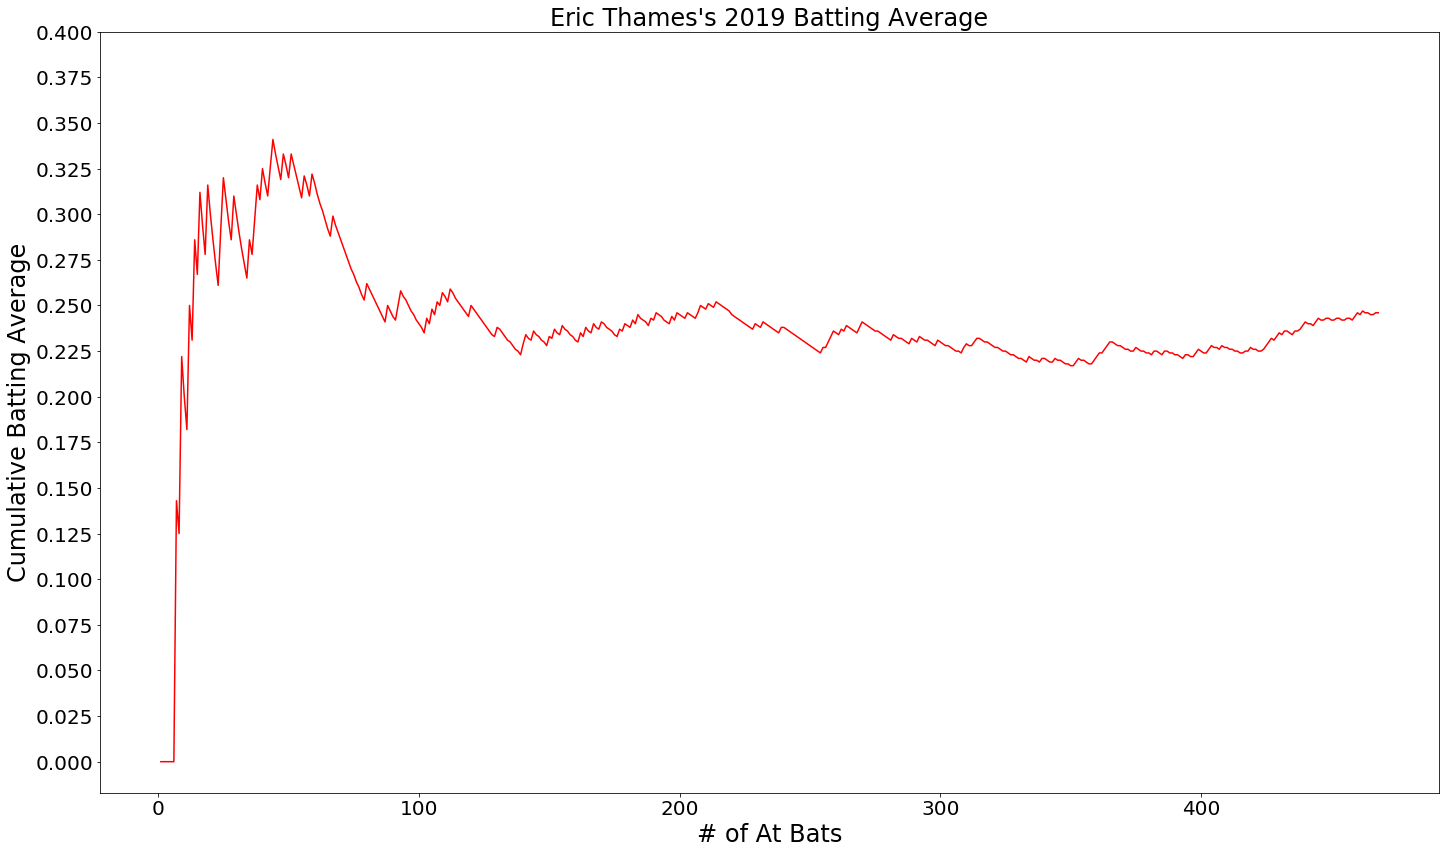

In [194]:
# Import Thames data
df_thames = pd.read_csv('Thames17.csv')
# Remove 1.000 average for visualization purposes
df_thames = df_thames[1:546]
# Run through function
cumulative_avg(df_thames)
# Visualize
visualize(df_thames, 'Eric Thames', 'ethames3')

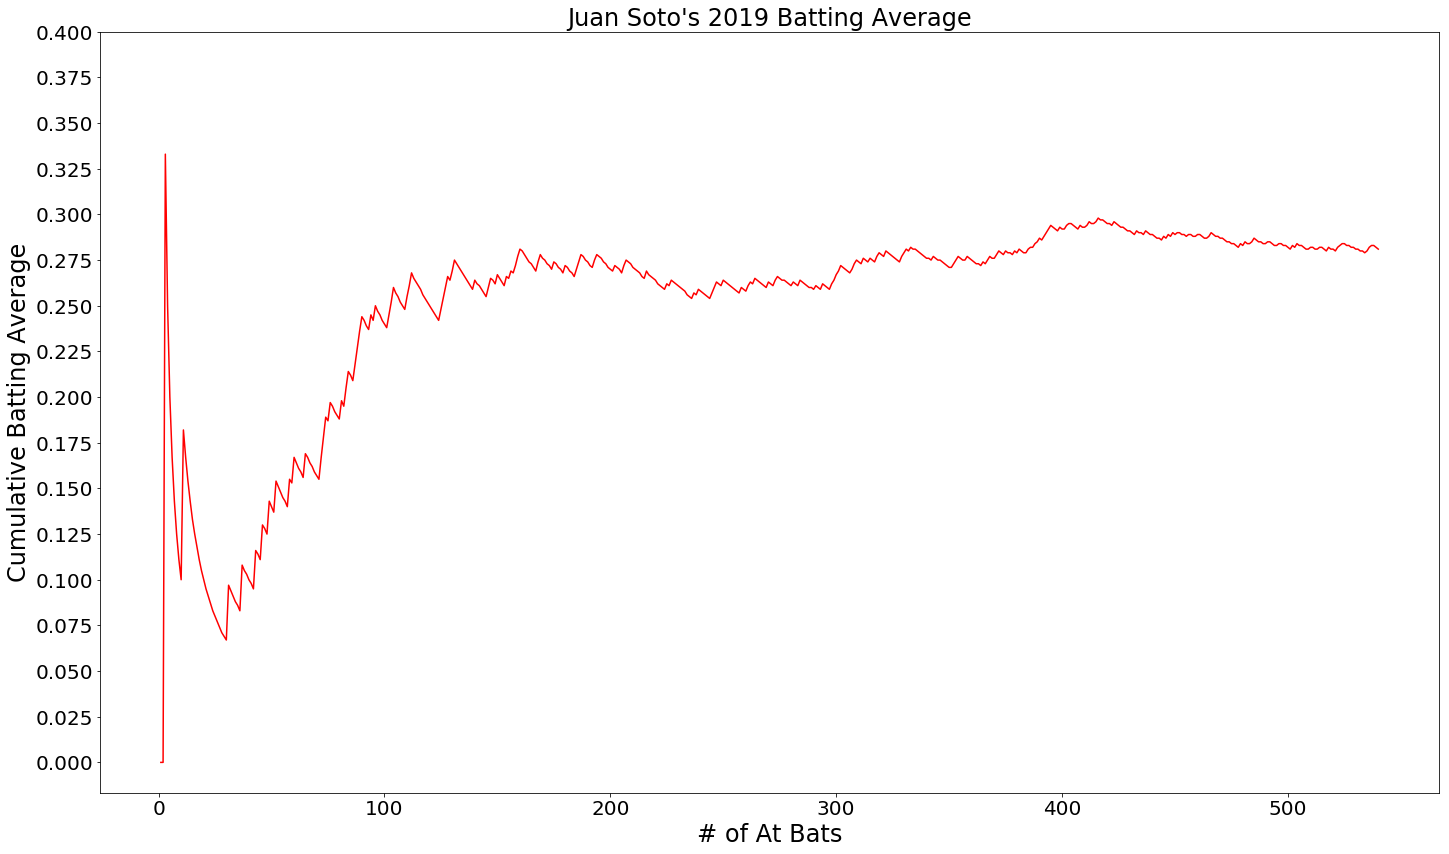

In [195]:
# Import Soto data
df_soto = pd.read_csv('soto.csv')
# Remove 1.000 average for visualization
df_soto = df_soto[2:656]
# Run through function
cumulative_avg(df_soto)
# Visualize
visualize(df_soto, 'Juan Soto', 'jso3')

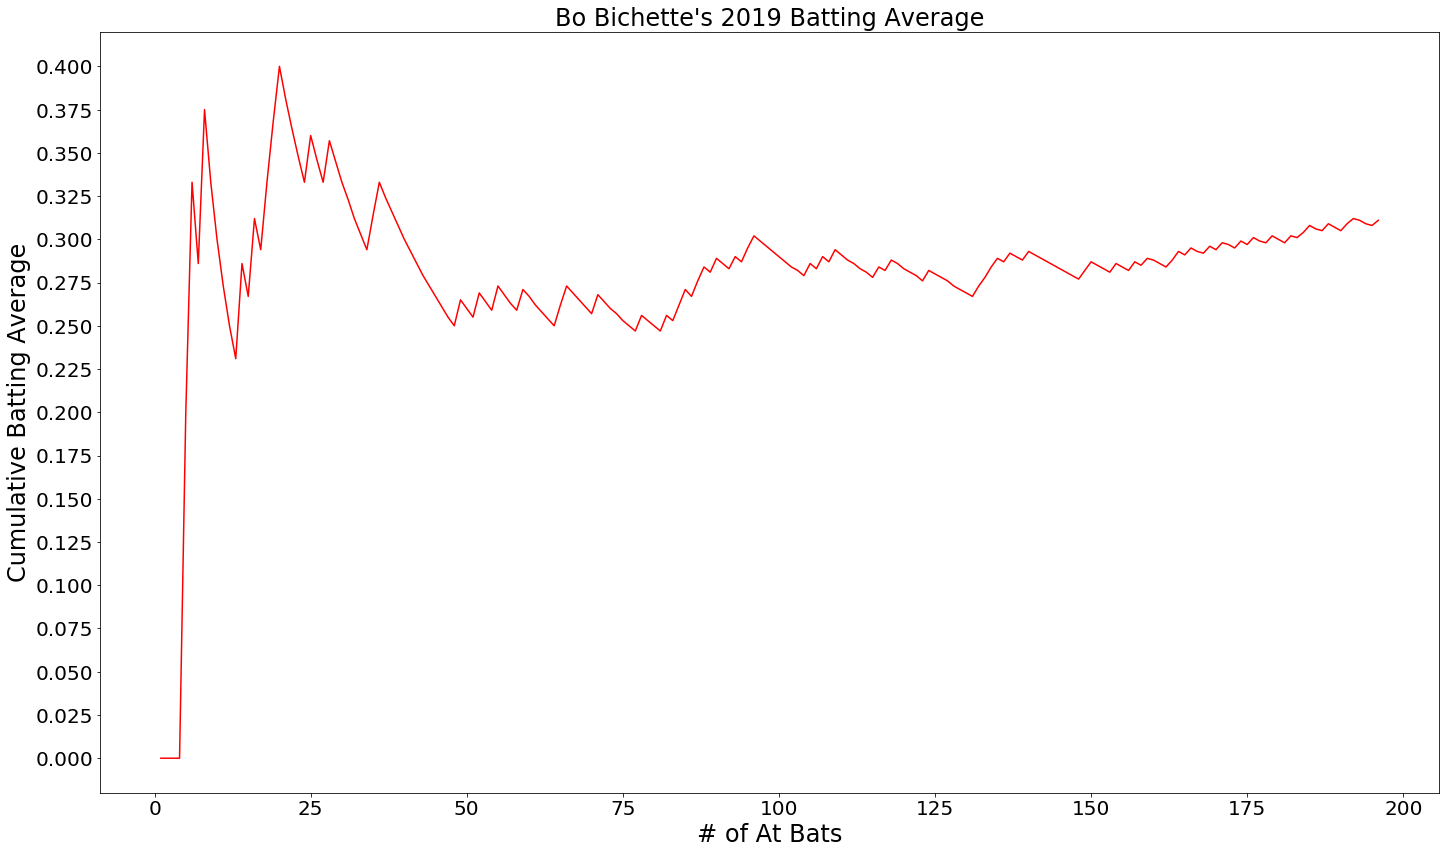

In [196]:
# Import Bichette data
df_bichette = pd.read_csv('bichette.csv')
# Run through function
cumulative_avg(df_bichette)
# Visualize
visualize(df_bichette, 'Bo Bichette', 'bobich3')